P1:  1.000e+06 MPa
P2:  6.000e+05 MPa
T1:  480 K
V1:  1.378e-01 m^3
V2:  2.073e-01 m^3
T2:  433.38261669476844 K
const:  83927.42867673482


Text(0, 0.5, 'P (Pa)')

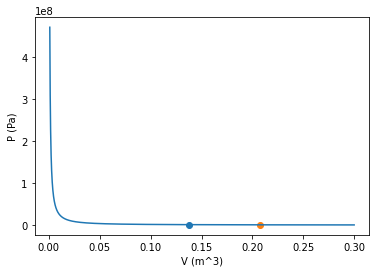

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

P1 = 1E6
P2 = 0.6E6
n = 1.25
T1 = 480
R = 287

print ("P1:  "f"{P1:.3e} MPa")
print ("P2:  "f"{P2:.3e} MPa")
print ("T1:  "f"{T1} K")

V1 = R*T1/P1
print ("V1:  "f"{V1:.3e} m^3")

V2 =  V1/((P2/P1)**(1/n)) 
print ("V2:  "f"{V2:.3e} m^3")

T2 = P2*V2/R
print ("T2:  "f"{T2} K")

#PV^n = const
const = P1*V1**n
print ("const:  "f"{const}")

V_var = np.arange(1E-3, 0.3, 0.1E-3)
P_var = const/(V_var)**n

plt.plot(V_var, P_var)
plt.scatter(V1, P1)
plt.scatter(V2, P2)
plt.xlabel("V (m^3)")
plt.ylabel("P (Pa)")



Cv:  0.779375 кДж/(кг K)
Cp:  1.0390625 кДж/(кг K)
q:  12.091383794794435 кДж/кг
P1*V1:  137760.0 кДж/кг
P2*V2:  124380.81099139854 кДж/кг
L:  53516.756034405844 кДж/кг
L':  66895.9450430073 кДж/кг
dU:  -36.33242311351484 кДж/кг
dH:  -48.43837484059216 кДж/кг
dS:  146.50079807090046  


Text(0, 0.5, 'S ')

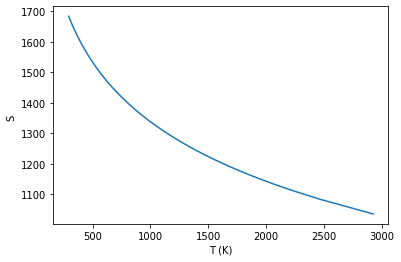

In [34]:

mu = 32 # кг/кмоль
muCv = 24.94 # кДж/(кмоль К)
muCp = 33.25 # кДж/(кмоль К)

Cv = muCv/mu
Cp = muCp/mu

k = Cp/Cv

print ("Cv:  "f"{Cv} кДж/(кг K)")
print ("Cp:  "f"{Cp} кДж/(кг K)")

q = Cv*(n-k)/(n-1)*(T2-T1)

print ("q:  "f"{q} кДж/кг")

print ("P1*V1:  "f"{P1*V1} кДж/кг")
print ("P2*V2:  "f"{P2*V2} кДж/кг")

L = (P1*V1 - P2*V2)/(n-1)
L1 = L*n

print ("L:  "f"{L} кДж/кг")
print ("L':  "f"{L1} кДж/кг")

dU = Cv*(T2-T1)
dH = Cp*(T2-T1)
dS = Cp*math.log(T2/T1)- R*math.log(P2/P1)

print ("dU:  "f"{dU} кДж/кг")
print ("dH:  "f"{dH} кДж/кг")
print ("dS:  "f"{dS}  ")

T0 = 273  #К
P0 = 1.013E5 #Па

V_var = np.arange(1E-4, 1, 0.1E-3)
P_var = const/(V_var)**n
T_var = P_var*V_var/R
#S_var = Cp*math.log(T_var/T0)- R*math.log(P_var/P0)


def count(t, p):
  return Cp*math.log(t/T0)-R*math.log(p/P0)

S_var = [count(t, p) for t, p in zip(P_var, T_var)]
    
    
plt.plot(T_var, S_var)
plt.xlabel("T (K)")
plt.ylabel("S ")

